### Homework 4 questions 6-7

Q6. The following data are the number of days of upwelling-relaxation events recorded seasonally in the Monterey Bay over 5-6 year period. Test the null hypothesis that the number of upwelling-relaxation events is the same for each season. Which seasons are different from each other?


#### ANOVA - analysis of variance
From Emmory and Thompson, pg. 267:
> In essence, ANOVA is a test between the amount of variation in the data that can be attributed to chance and that which can be attributed to specific causes and effects. If the amount of shared variability *between* samples is small relative to the shared variability *within* samples, then the null hypothesis, H0,--- that the varaiability occured by chance--- cannot be rejected.

In [58]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
from statsmodels.stats import multicomp

In [22]:
#Create Data
winter = np.array([4.7,4.9,5.0,4.8,4.7,4.7])
spring = np.array([4.6,4.4,4.3,4.4,4.1,4.2])
summer = np.array([4.8,4.7,4.6,4.4,4.7,4.8])
fall = np.array([4.9,5.2,5.4,5.1,5.6,5.6])

df = pd.DataFrame(data={'winter':winter,
                        'spring':spring,
                        'summer':summer,
                        'fall':fall})
# Reorginize for tukey 
df_reorg = pd.DataFrame(columns=['days_upwell','season'])
df_reorg['days_upwell'] =np.concatenate((winter,spring,summer,fall))
df_reorg['season'][:6] = 'winter'
df_reorg['season'][6:12] = 'sping'
df_reorg['season'][12:18] = 'summer'
df_reorg['season'][18:24] = 'fall'

    days_upwell  season
0           4.7  winter
1           4.9  winter
2           5.0  winter
3           4.8  winter
4           4.7  winter
5           4.7  winter
6           4.6   sping
7           4.4   sping
8           4.3   sping
9           4.4   sping
10          4.1   sping
11          4.2   sping
12          4.8  summer
13          4.7  summer
14          4.6  summer
15          4.4  summer
16          4.7  summer
17          4.8  summer
18          4.9    fall
19          5.2    fall
20          5.4    fall
21          5.1    fall
22          5.6    fall
23          5.6    fall


/Users/Patrick/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/Patrick/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/Patrick/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/Patrick/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:16: SettingWithCopyWarning: 
A value is trying to 

##### One-way ANOVA
From scipy.stats.f_oneway docs:
> The one-way ANOVA tests the null hypothesis that two or more groups have the same population mean. The test is applied to samples from two or more groups, possibly with differing sizes.

In [9]:
# ANOVA - oneway
f_val, p_val = stats.f_oneway(df.winter, df.spring, df.summer, df.fall)
print "P =", p_val

P = 4.34249417723e-07


Since P < .05, the means we can reject with 95% confidence the H0 that each group has the same population mean

In [30]:
mc1 = multicomp.MultiComparison(df_reorg.days_upwell,df_reorg.season)
res1 = mc1.tukeyhsd()
print res1.summary()

Multiple Comparison of Means - Tukey HSD,FWER=0.05
group1 group2 meandiff  lower   upper  reject
---------------------------------------------
 fall  sping  -0.9667  -1.2789 -0.6544  True 
 fall  summer -0.6333  -0.9456 -0.3211  True 
 fall  winter   -0.5   -0.8122 -0.1878  True 
sping  summer  0.3333   0.0211  0.6456  True 
sping  winter  0.4667   0.1544  0.7789  True 
summer winter  0.1333  -0.1789  0.4456 False 
---------------------------------------------


The post hoc analysis, TukeyHSD, shows that in all seasons, except summer and winter, we can reject the null hypothesis.

Running a pairwise test on all pairs with multiple test correction also fails to reject the null hypothesis between summer and winter.

In [31]:
res2 = mc1.allpairtest(stats.ttest_rel, method='Holm')
print res2[0]

Test Multiple Comparison ttest_rel 
FWER=0.05 method=Holm
alphacSidak=0.01, alphacBonf=0.008
group1 group2   stat   pval  pval_corr reject
---------------------------------------------
 fall  sping   5.2086 0.0034   0.0164   True 
 fall  summer  5.2697 0.0033   0.0164   True 
 fall  winter  3.873  0.0117   0.0352   True 
sping  summer -3.4922 0.0174   0.0352   True 
sping  winter  -5.534 0.0026   0.0159   True 
summer winter -1.3969 0.2213   0.2213  False 
---------------------------------------------


Q7. You want to test wheter sediment diameter (mm) differs between Carmel River Beach and Monastery Beach, two beaches are with very different slopes. After taking random samples from each beach, you discover that they are composed of fairly large particles and some smaller sediment. Examine the sediment size distribution, and determine if there is a difference between the grain size at each location.


Methods: In order to establish that they are different, use a t-test to check that the population means are different, ie reject H0.

In [56]:
carmel = np.array([4.,4.1,3.8,3.6,1.2,0.9,2.8,0.6,0.7,3.6])
monastery = np.array([7.,1.,2.,3.5,11.5,14.,12.5,17.,15.,3.5])
df_sediment = pd.DataFrame(data={'carmel':carmel,
                                 'monastery':monastery})

,carmel,monastery
count,10.000000,10.00000
mean,2.530000,8.70000
std,1.494471,5.96378
min,0.600000,1.00000
25%,0.975000,3.50000
50%,3.200000,9.25000
75%,3.750000,13.62500
max,4.100000,17.00000


In [54]:
# ttest_ind() test two independent variables
#Check if varaince are equal, or at least close
print 'Varaince'
print '*'*20
print 'Carmel Beach:', np.var(df_sediment.carmel)
print 'Monastery Beach:',np.var(df_sediment.monastery)

# Since the vars are not equal, setting equal_var=False will perform a Welch's t-test
t, prob = stats.ttest_ind(df_sediment.carmel,df_sediment.monastery,equal_var=False) #prob = two tailed p-value
print
print "P:",prob

Varaince
********************
Carmel Beach: 2.0101
Monastery Beach: 32.01

P: 0.00977957977956


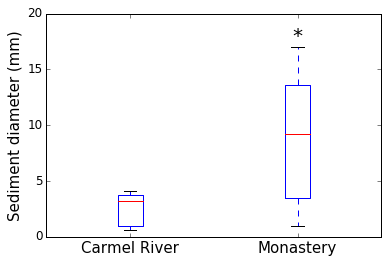

In [93]:
fig, ax1 = plt.subplots(1)
ax1.boxplot(df_sediment.values)
ax1.tick_params(axis='y', labelsize=12)
ax1.xaxis.set_ticklabels(["Carmel River","Monastery"], size = 15)
ax1.set_ylabel('Sediment diameter (mm)', size=15)
ax1.set_ylim(0,20)
# Get location of the ticks
tickLoc = ax1.xaxis.get_ticklocs()
ax1.text(tickLoc[1], 18,'*',horizontalalignment='center',verticalalignment='center',size=20)

Based on the t-test, with 99% confidence we can reject the null hypothesis that the grain sizes of Carmel River beach and Monastary beach have different population means.